In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [5]:
start = '2010-01-01'
end = '2019-01-01'
df = data.DataReader('AAPL','yahoo',start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.589466
2018-12-26,39.307499,36.680000,37.075001,39.292500,234330000.0,38.095741
2018-12-27,39.192501,37.517502,38.959999,39.037498,212468400.0,37.848503
2018-12-28,39.630001,38.637501,39.375000,39.057499,169165600.0,37.867897
2018-12-31,39.840000,39.119999,39.632500,39.435001,140014000.0,38.233891


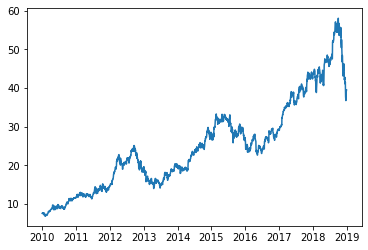

In [7]:
plt.plot(df.Close)

In [8]:
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
...,...,...,...,...,...,...
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.589466
2018-12-26,39.307499,36.680000,37.075001,39.292500,234330000.0,38.095741
2018-12-27,39.192501,37.517502,38.959999,39.037498,212468400.0,37.848503


In [16]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2009-12-31          NaN
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
                ...    
2018-12-24    51.285075
2018-12-26    51.159525
2018-12-27    51.029925
2018-12-28    50.897825
2018-12-31    50.774400
Name: Close, Length: 2265, dtype: float64

In [15]:
df = df.drop(['Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0


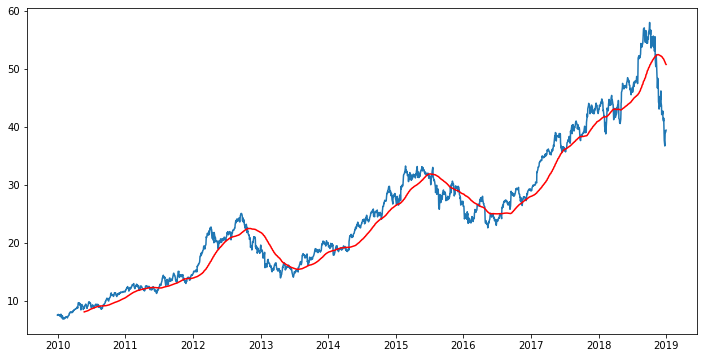

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2009-12-31          NaN
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
                ...    
2018-12-24    48.436525
2018-12-26    48.405838
2018-12-27    48.376063
2018-12-28    48.348300
2018-12-31    48.322163
Name: Close, Length: 2265, dtype: float64

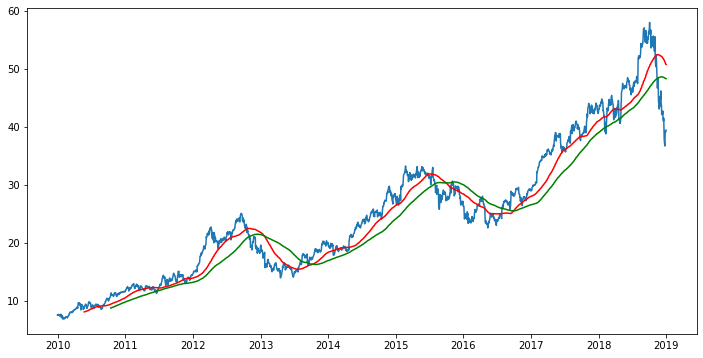

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [21]:
df.shape


(2265, 6)

In [22]:
#splitting Data into Training and Testing


data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1585, 1)
(680, 1)


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [24]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.78070233],
       [0.7582516 ],
       [0.75285205]])

In [25]:
data_training_array.shape


(1585, 1)

In [26]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train

[array([[2.52790771e-02],
        [2.97178191e-02],
        [3.02185410e-02],
        [2.56038878e-02],
        [2.50760817e-02],
        [2.69706691e-02],
        [2.44400837e-02],
        [2.12057268e-02],
        [2.51708129e-02],
        [2.35198380e-02],
        [1.87833875e-02],
        [3.11116846e-02],
        [2.66323796e-02],
        [2.16793646e-02],
        [7.71362572e-03],
        [1.49130326e-02],
        [1.87969205e-02],
        [2.14222733e-02],
        [9.79765742e-03],
        [1.35149573e-05],
        [3.62674239e-03],
        [5.15593812e-03],
        [9.71645927e-03],
        [0.00000000e+00],
        [4.61461711e-03],
        [2.80124591e-03],
        [5.60252796e-03],
        [4.15451231e-03],
        [8.95862792e-03],
        [1.12727391e-02],
        [1.53596224e-02],
        [1.42093514e-02],
        [1.47235702e-02],
        [1.30184452e-02],
        [1.13268532e-02],
        [6.77986503e-03],
        [1.16516638e-02],
        [1.34650350e-02],
        [1.7

In [27]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [28]:

x_train.shape

(1485, 100, 1)

In [32]:
#ML MODEL

In [29]:
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.layers import Dropout

In [30]:
model= Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
          
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
          
          
model.add(LSTM(units = 50, activation = 'relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units = 1))




In [32]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [34]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
47/47 [==============================] - 26s 295ms/step - loss: 0.0710
Epoch 2/50
47/47 [==============================] - 14s 299ms/step - loss: 0.0202
Epoch 3/50
47/47 [==============================] - 14s 301ms/step - loss: 0.0191
Epoch 4/50
47/47 [==============================] - 14s 306ms/step - loss: 0.0152
Epoch 5/50
47/47 [==============================] - 14s 306ms/step - loss: 0.0162
Epoch 6/50
47/47 [==============================] - 14s 306ms/step - loss: 0.0144
Epoch 7/50
47/47 [==============================] - 14s 308ms/step - loss: 0.0128
Epoch 8/50
47/47 [==============================] - 14s 304ms/step - loss: 0.0120
Epoch 9/50
47/47 [==============================] - 15s 309ms/step - loss: 0.0118
Epoch 10/50
47/47 [==============================] - 14s 305ms/step - loss: 0.0108
Epoch 11/50
47/47 [==============================] - 14s 300ms/step - loss: 0.0104
Epoch 12/50
47/47 [==============================] - 14s 305ms/step - loss: 0.0102
Epoch 13/50
4

In [35]:
model.save('keras_model.h5')

In [36]:
data_testing.head()


,Close
Date,
2016-04-20,26.782499
2016-04-21,26.492500
2016-04-22,26.420000
2016-04-25,26.270000
2016-04-26,26.087500


In [37]:
past_100_days = data_training.tail(100)

In [38]:
final_df = past_100_days.append(data_testing,ignore_index = True)

In [39]:
final_df.head()

,Close
0,29.719999
1,29.507500
2,29.452499
3,29.575001
4,29.334999


In [41]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.20136879],
       [0.19537148],
       [0.19381923],
       [0.19727654],
       [0.19050305],
       [0.18302406],
       [0.17540393],
       [0.20242715],
       [0.1971354 ],
       [0.19678265],
       [0.17836735],
       [0.18224794],
       [0.1611515 ],
       [0.15621255],
       [0.14217173],
       [0.14816904],
       [0.13151771],
       [0.11070346],
       [0.11987585],
       [0.11917029],
       [0.1289071 ],
       [0.1248148 ],
       [0.11627744],
       [0.12982431],
       [0.11980528],
       [0.10527062],
       [0.1059056 ],
       [0.08727864],
       [0.07309673],
       [0.04311014],
       [0.04670855],
       [0.05778594],
       [0.06787555],
       [0.04974249],
       [0.06477104],
       [0.047908  ],
       [0.04459188],
       [0.0455091 ],
       [0.04205183],
       [0.07817682],
       [0.06420663],
       [0.06808721],
       [0.02173147],
       [0.02645876],
       [0.04938968],
       [0.04296905],
       [0.02921052],
       [0.042

In [42]:
input_data.shape

(780, 1)

In [43]:
x_test = []
y_test = []
for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [44]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(680, 100, 1)
(680,)


In [46]:
# Model Prediction

y_predicted = model.predict(x_test)

In [47]:
y_predicted.shape

(680, 1)

In [48]:
y_test

array([0.11846468, 0.11028014, 0.10823399, 0.1040006 , 0.09884993,
       0.05277643, 0.03167999, 0.02398928, 0.02328373, 0.03414946,
       0.02716437, 0.02046145, 0.01679253, 0.01728642, 0.02173147,
       0.01531084, 0.        , 0.00127002, 0.02497707, 0.02222537,
       0.02977493, 0.02723489, 0.0344317 , 0.04296905, 0.05334089,
       0.06547665, 0.07105064, 0.07062726, 0.06717   , 0.05729205,
       0.05207087, 0.05348198, 0.0584915 , 0.06131378, 0.06067879,
       0.06568831, 0.05990267, 0.04938968, 0.05023638, 0.04797857,
       0.05087142, 0.03520783, 0.033585  , 0.03930013, 0.03676008,
       0.04064067, 0.02159038, 0.01199467, 0.02293092, 0.02864605,
       0.03711283, 0.03915898, 0.03280887, 0.03661894, 0.03951179,
       0.04473297, 0.04684969, 0.04995415, 0.04607356, 0.05962043,
       0.05954986, 0.06695833, 0.06724057, 0.06787555, 0.06413606,
       0.05870322, 0.04938968, 0.0446624 , 0.08897199, 0.09877936,
       0.09786214, 0.1108446 , 0.0997672 , 0.10901011, 0.10957

In [49]:
y_predicted


array([[0.20623836],
       [0.20695564],
       [0.20742393],
       [0.20760822],
       [0.20749618],
       [0.20709334],
       [0.20639145],
       [0.20537388],
       [0.20403148],
       [0.20236595],
       [0.20036367],
       [0.19808188],
       [0.1955762 ],
       [0.1929051 ],
       [0.1901281 ],
       [0.18730548],
       [0.18449007],
       [0.18171778],
       [0.17895234],
       [0.17625764],
       [0.17369124],
       [0.17130415],
       [0.16912672],
       [0.16718243],
       [0.16548602],
       [0.16406319],
       [0.16295055],
       [0.16218856],
       [0.1618014 ],
       [0.1617831 ],
       [0.16209199],
       [0.16261676],
       [0.1632904 ],
       [0.1640582 ],
       [0.16487241],
       [0.16569465],
       [0.16649629],
       [0.16725904],
       [0.16796072],
       [0.16857699],
       [0.1690901 ],
       [0.16948968],
       [0.16976883],
       [0.16991626],
       [0.16992958],
       [0.16981678],
       [0.16959223],
       [0.169

In [50]:
scaler.scale_

array([0.02822267])

In [51]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

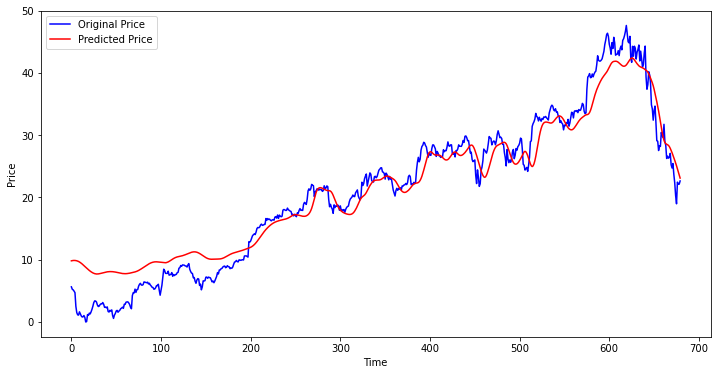

In [52]:
plt.figure(figsize = (12,6 ))
plt.plot(y_test,'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()